# Uncovering the Metrics That Matter: A Linear Modeling Approach to Hamstring Injury Risk in College Football



---



Jinwoo Choi

University of Arizona

October 12,2025


## Data Preparation

In [1]:
from google.colab import files

import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['masterdata_data476.csv']))

Saving masterdata_data476.csv to masterdata_data476.csv


In [3]:
df['DB'] = np.where(df['Position'] == 'DB', 1, 0)
df['WR'] = np.where(df['Position'] == 'WR', 1, 0)
df['LB'] = np.where(df['Position'] == 'LB', 1, 0)
df['RB'] = np.where(df['Position'] == 'RB', 1, 0)
df['TE'] = np.where(df['Position'] == 'TE', 1, 0)
df['DL'] = np.where(df['Position'] == 'DL', 1, 0)
df['OL'] = np.where(df['Position'] == 'OL', 1, 0)

In [4]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace('/', '_')


In [5]:
df.columns

Index(['Player', 'Period_Name', 'Period_Number', 'Position',
       'Velocity_Band_5_Total_Effort_Count', 'Velocity_Band_5_Total_Distance',
       'Velocity_Band_6_Total_Effort_Count', 'Velocity_Band_6_Total_Distance',
       'Distance', 'Player_Load', 'PL_Min', 'Hi_Accel', 'Hi_Decel',
       'Total_Contacts', 'Date', 'Game', 'DB', 'WR', 'LB', 'RB', 'TE', 'DL',
       'OL'],
      dtype='object')

In [6]:
df = df.drop(columns=['Period_Name', 'Period_Number', 'Position', 'Total_Contacts'])

## Linear Model

In [7]:

df['High_Distance'] = df['Velocity_Band_5_Total_Distance'] + df['Velocity_Band_6_Total_Distance']
df['High_dist_ratio'] = df['High_Distance'] / (df['Distance']-500)

In [8]:
model = ols("High_dist_ratio ~ Velocity_Band_5_Total_Distance + Velocity_Band_5_Total_Effort_Count + Velocity_Band_6_Total_Distance + Velocity_Band_6_Total_Effort_Count + Distance + Player_Load + PL_Min + Hi_Accel + Hi_Decel + Game + DB + WR + LB + RB + TE + DL + OL", data=df).fit()


In [9]:
df

,Player,Velocity_Band_5_Total_Effort_Count,Velocity_Band_5_Total_Distance,Velocity_Band_6_Total_Effort_Count,Velocity_Band_6_Total_Distance,Distance,Player_Load,PL_Min,Hi_Accel,Hi_Decel,...,Game,DB,WR,LB,RB,TE,DL,OL,High_Distance,High_dist_ratio
0,Louis Akpa,0,0.000,0,0.000,2426.388,376.466,3.062,0,0,...,0,0,0,0,0,0,0,1,0.000,0.000000
1,Sawyer Anderson,0,0.000,0,0.000,3138.285,297.796,2.953,0,0,...,0,0,0,0,0,0,0,0,0.000,0.000000
2,Jarra Anderson,2,9.908,1,18.930,2422.083,386.680,3.132,2,3,...,0,0,0,0,0,0,1,0,28.838,0.015004
3,Malachi Bailey,1,8.005,0,0.000,2761.800,429.922,3.482,1,2,...,0,0,0,0,0,0,1,0,8.005,0.003539
4,Cam Barmore,0,0.000,0,0.000,2446.914,302.858,2.745,4,5,...,0,0,0,0,0,1,0,0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,Javin Whatley,7,120.232,1,4.921,5933.380,569.946,2.636,14,11,...,1,0,1,0,0,0,0,0,125.153,0.023034
3799,Riley Wilson,6,82.918,0,0.000,5262.358,521.952,2.336,5,7,...,1,0,0,1,0,0,0,0,82.918,0.017411
3800,Michael Wooten,0,0.000,0,0.000,3391.609,414.638,1.918,0,0,...,1,0,0,0,0,0,0,1,0.000,0.000000
3801,Luke Wysong,5,84.449,0,0.000,6669.415,729.159,3.359,16,13,...,1,0,1,0,0,0,0,0,84.449,0.013688


In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        High_dist_ratio   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     879.8
Date:                Mon, 13 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:41:06   Log-Likelihood:                 15672.
No. Observations:                3803   AIC:                        -3.131e+04
Df Residuals:                    3785   BIC:                        -3.120e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

## Visualization

Text(0.5, 1.0, 'Residual vs Fitted')

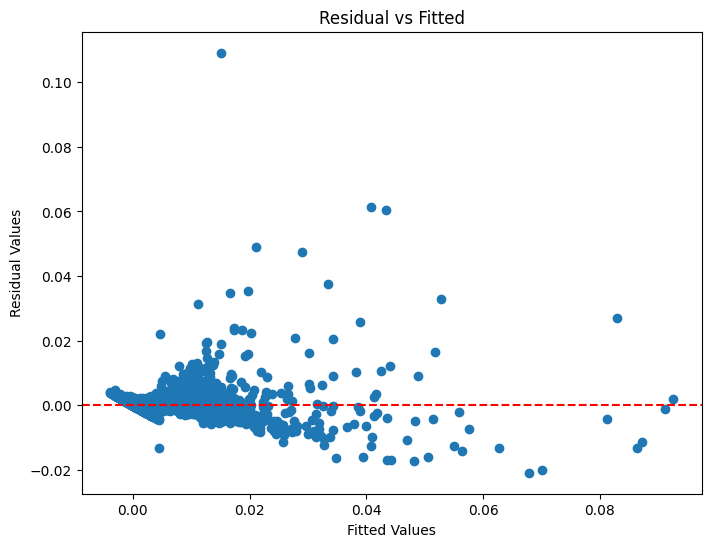

In [11]:
resid = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8,6))
plt.scatter(fitted, resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.title('Residual vs Fitted')

<function matplotlib.pyplot.show(close=None, block=None)>

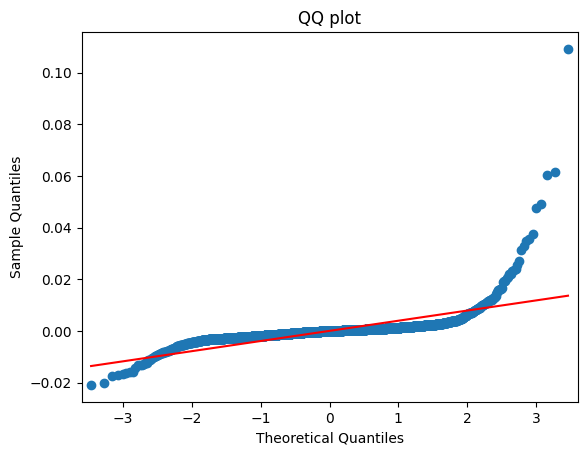

In [12]:
fig = sm.qqplot(resid, line='s')
plt.title('QQ plot')
plt.show

In [13]:
statistic, p_value = stats.shapiro(resid)
print(f"Shapiro-Wilk Test Statistic: {statistic:.3f}")
print(f"P-value: {p_value:.3f}")

Shapiro-Wilk Test Statistic: 0.486
P-value: 0.000


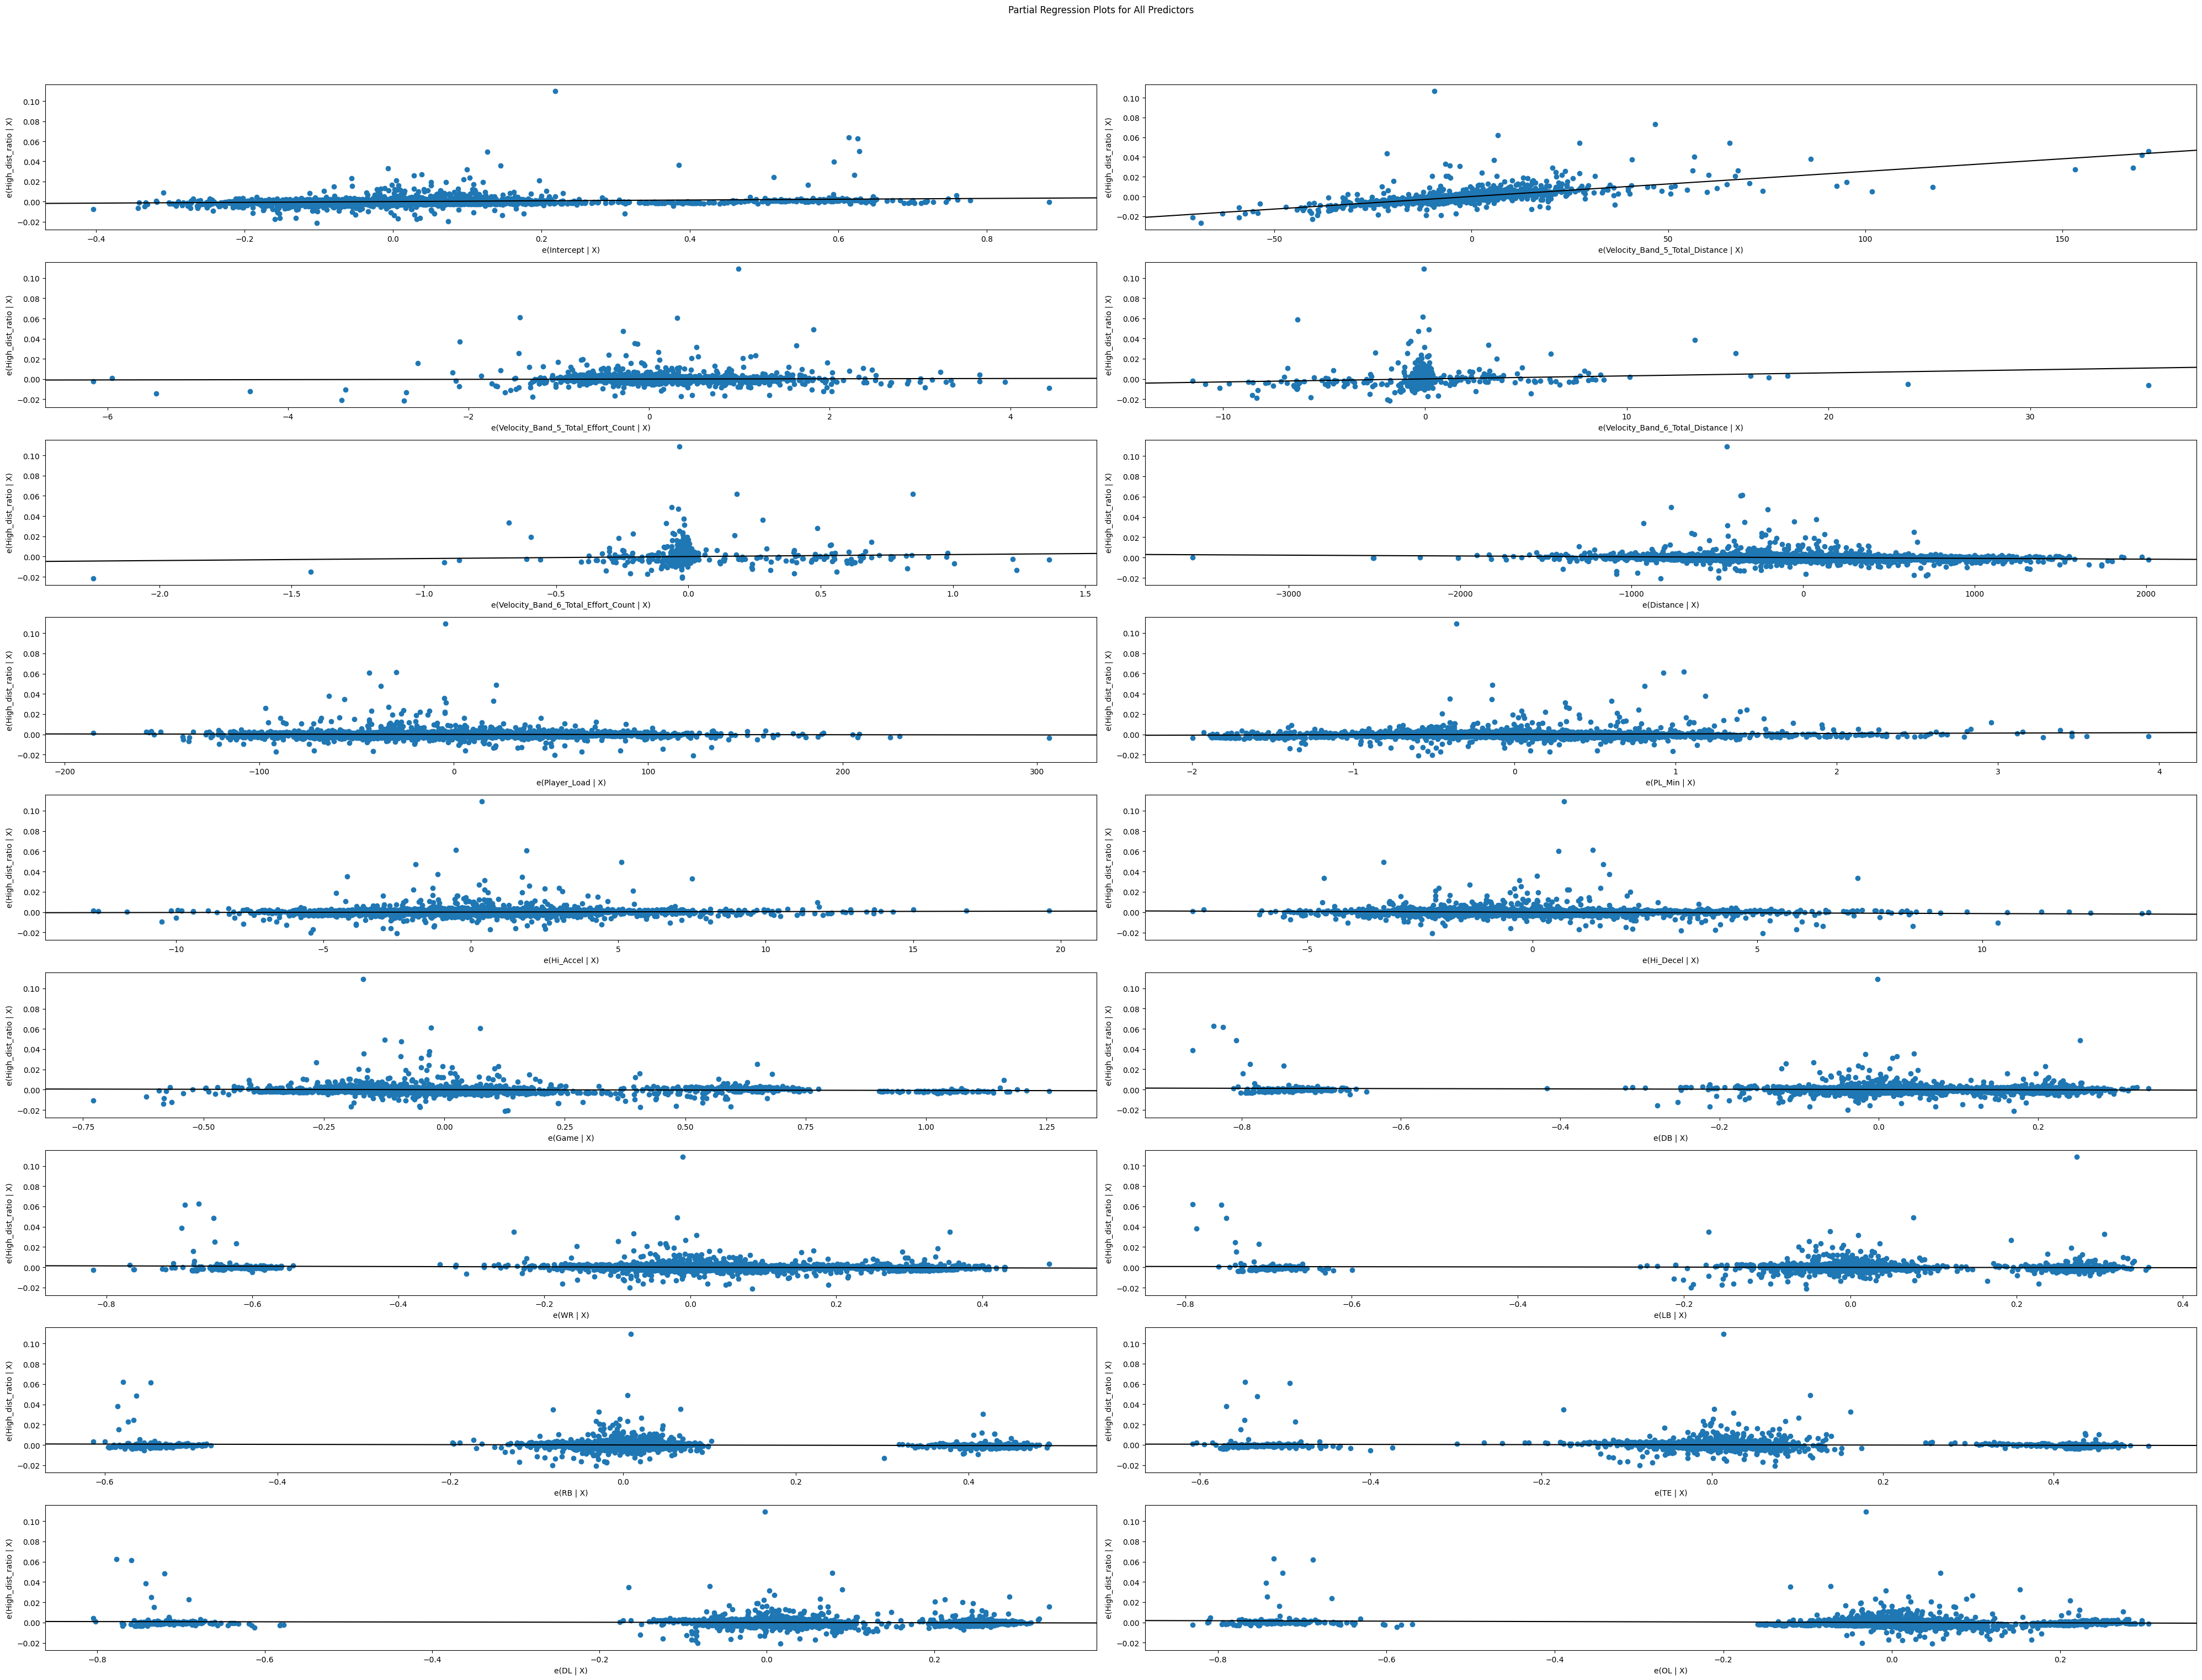

In [14]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig = plt.figure(figsize=(40, 32))
plot_partregress_grid(model, fig=fig)
fig.suptitle('Partial Regression Plots for All Predictors')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In [15]:
model = ols("High_dist_ratio ~ Velocity_Band_5_Total_Distance + Velocity_Band_6_Total_Distance + Velocity_Band_6_Total_Effort_Count + Distance + Hi_Accel + Hi_Decel + Game + DB + WR + LB + RB + TE + DL + OL", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        High_dist_ratio   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1062.
Date:                Mon, 13 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:41:11   Log-Likelihood:                 15662.
No. Observations:                3803   AIC:                        -3.129e+04
Df Residuals:                    3788   BIC:                        -3.120e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

## Evalutating Metrics

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

X = df[['Velocity_Band_5_Total_Effort_Count', 'Velocity_Band_5_Total_Distance','Velocity_Band_6_Total_Effort_Count', 'Velocity_Band_6_Total_Distance','Distance', 'Player_Load', 'PL_Min', 'Hi_Accel', 'Hi_Decel', 'Game', 'DB', 'WR', 'LB', 'RB', 'TE', 'DL','OL']]
y = df['High_dist_ratio']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.5421293423924332e-05
Mean Absolute Error: 0.0016821471803978546
